Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


#NLTK  _ special design for natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Wordcloud 
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

#sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Evalution metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from scikitplot.metrics import plot_confusion_matrix

Importing the Dataset

path:-"C:\Users\asus\Downloads\custom_data\train.txt"

In [3]:
df_train=pd.read_csv("C:/Users/asus/Downloads/sentiment/train.txt",delimiter=';',names=['text','label'])
df_val=pd.read_csv("C:/Users/asus/Downloads/sentiment/val.txt",delimiter=';',names=['text','label'])

In [4]:
df_train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [6]:
df=pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [7]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
df.tail()

,text,label
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy
17999,i feel like i just wanna buy any cute make up ...,joy


In [9]:
df.shape

(18000, 2)

In [10]:
df.sample(5)

,text,label
8112,a scene in a film in which one man repressed a...,anger
5196,i feel dull many of a time headache many of ti...,sadness
3075,ive had a rather average career because i deci...,joy
1445,i feel like im so enraged,anger
14798,i visited the psychologist all those years ago...,fear


In [11]:
#how many categories are there in 'label 'column
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [12]:
#What is the strength of each category of 'label' column
df.label.value_counts()

label
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64

<Axes: xlabel='label'>

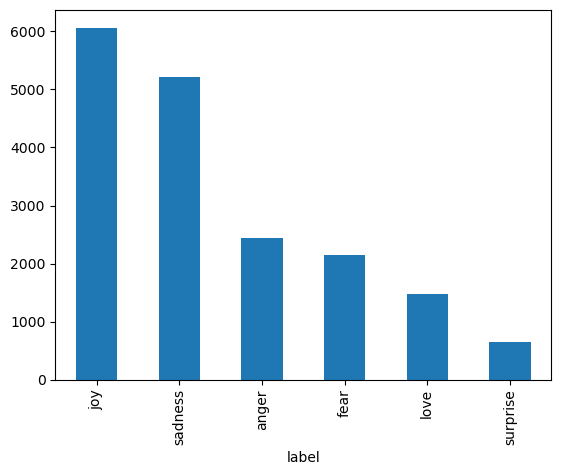

In [14]:
#What is the strength of each category of 'label' column in visualization form
df.label.value_counts().plot(kind='bar')

In [14]:
#Positive sentiment - joy , love, surprise  - label it as 1
#Negative sentiment - anger , sadness, fear - label it as 0

In [15]:
df.label.replace({'joy':1,'love':1,'surprise':1,'anger':0,'sadness':0,'fear':0},inplace=True)
#df.label.replace(to_replace=['joy','love','surprise'],value=1,inplace=True)
#df.label.replace(to_replace=['anger','sadness','fear'],value=0,inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_17968\1379612477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace({'joy':1,'love':1,'surprise':1,'anger':0,'sadness':0,'fear':0},inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_17968\1379612477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [16]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [17]:
#how many categories are there in 'label 'column
df.label.value_counts()

label
0    9799
1    8201
Name: count, dtype: int64

<Axes: xlabel='label'>

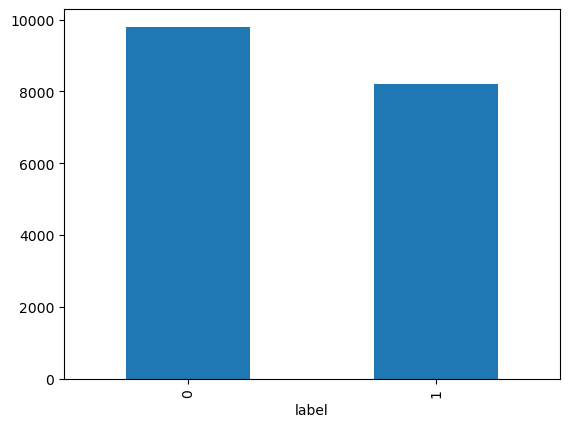

In [18]:
#What is the strength of each category of 'label' column in visualization form
df.label.value_counts().plot(kind='bar')

In [19]:
lm=WordNetLemmatizer()

In [20]:
def transformation(df_column):
    output=[]
    for i in df_column:
        new_text=re.sub('[^a-zA-Z]'," ",str(i))
        new_text=new_text.lower()
        new_text=new_text.split()
        new_text=[lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
        output.append(' '.join(str(k) for k in new_text))
    return output

In [21]:
var=transformation(df.text)

In [22]:
#var

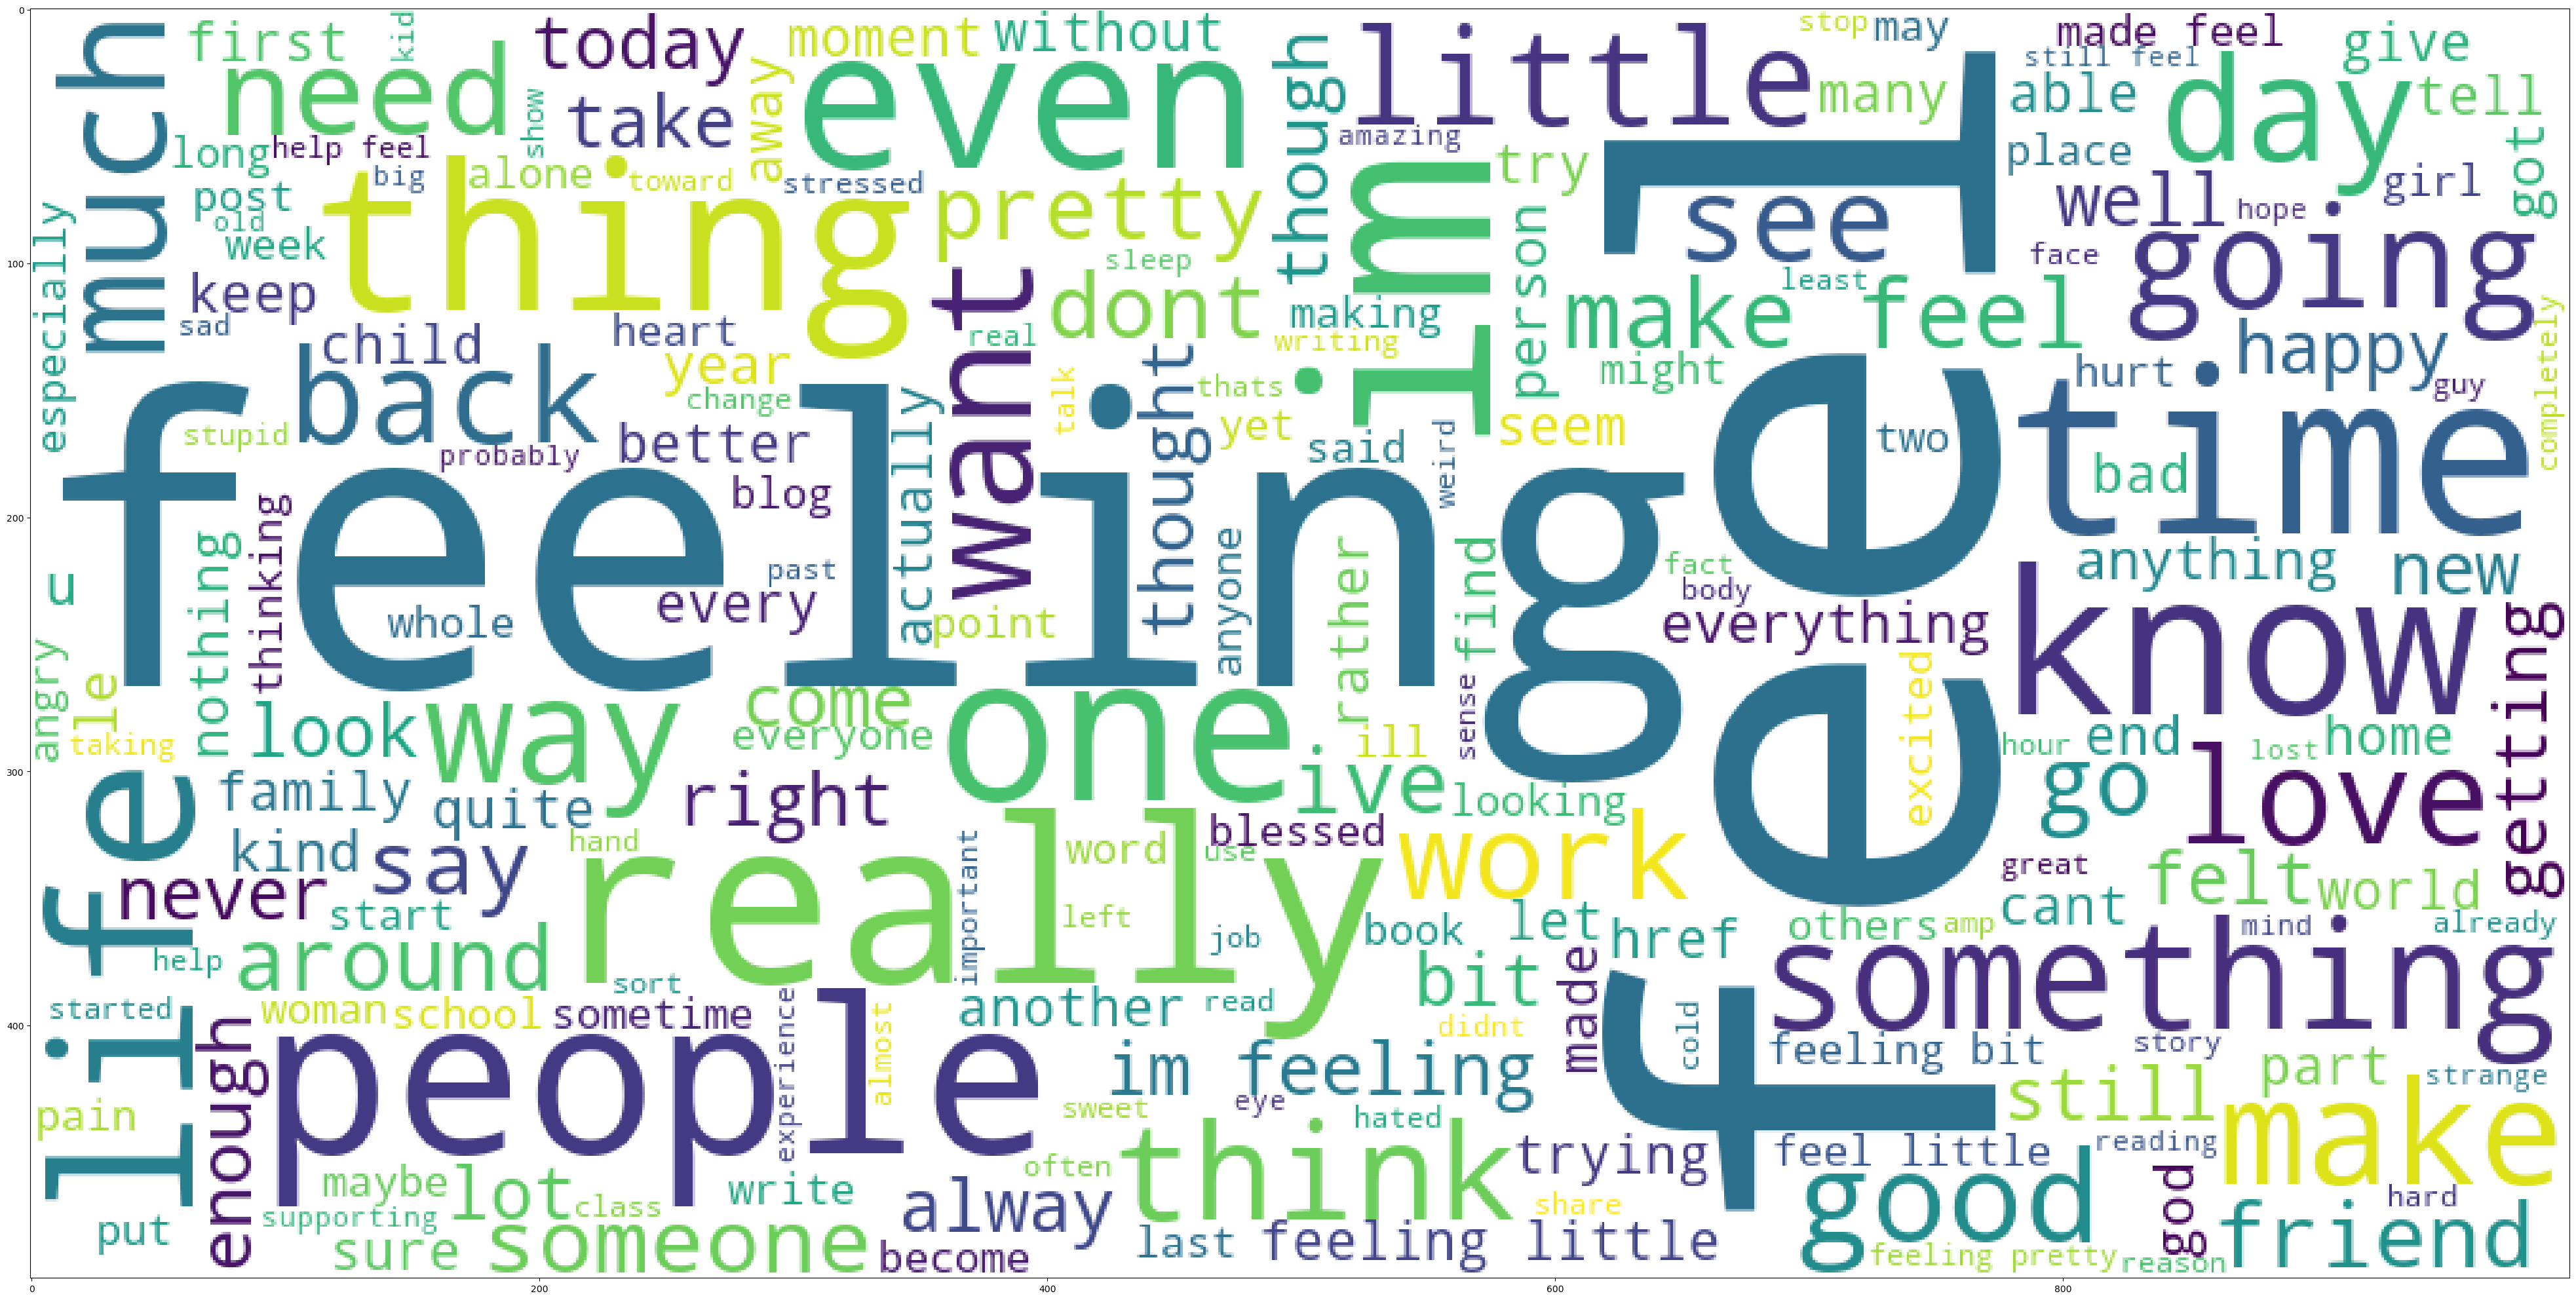

In [22]:
plt.figure(figsize=(50,28))
word=""
for i in var:
    for j in i:
        word +=" ".join(j)
wc=WordCloud(width=1000,height=500,background_color='white',min_font_size=10).generate(word)
plt.imshow(wc)

In [24]:
#Bag of words model ()

In [23]:
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(var)
x_train=traindata
y_train=df.label

In [24]:
x_train

<18000x117594 sparse matrix of type '<class 'numpy.int64'>'
	with 311217 stored elements in Compressed Sparse Row format>

choose the model

In [25]:
model=RandomForestClassifier()

Hyper Parameter Tuning

In [26]:
parameters={'max_features': ['sqrt'],
 'n_estimators': [50, 100],
 'max_depth': [5, 10],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [5, 10, 15],
 'bootstrap': [True]}

In [27]:
parameters

{'max_features': ['sqrt'],
 'n_estimators': [50, 100],
 'max_depth': [5, 10],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [5, 10, 15],
 'bootstrap': [True]}

In [28]:
grid_search=GridSearchCV(model,parameters,cv=5,
                        return_train_score=True,
                        n_jobs=1)

In [29]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [30]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [32]:
rfc = RandomForestClassifier(
    max_features=grid_search.best_params_['max_features'],
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    bootstrap=grid_search.best_params_['bootstrap']
)

In [33]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50)

### preparing the testing data

all step is same as train_data 

In [34]:
df_test=pd.read_csv("C:/Users/asus/Downloads/sentiment/test.txt",delimiter=';',names=['text','label'])

In [35]:
df_test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [36]:
df_test.tail()

,text,label
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy
1999,i feel all weird when i have to meet w people ...,fear


In [37]:
#how many categories are there in 'label 'column
df_test.label.unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [38]:
#how many categories are there in 'label 'column
df_test.label.value_counts()

label
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

In [39]:
df_test.label.replace(to_replace=['joy','love','surprise'],value=1,inplace=True)
df_test.label.replace(to_replace=['anger','sadness','fear'],value=0,inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_17968\1210007068.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.label.replace(to_replace=['joy','love','surprise'],value=1,inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_17968\1210007068.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [40]:
df_test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [41]:
#how many categories are there in 'label 'column
df_test.label.value_counts()

label
0    1080
1     920
Name: count, dtype: int64

In [42]:
var_test=transformation(df_test.text)

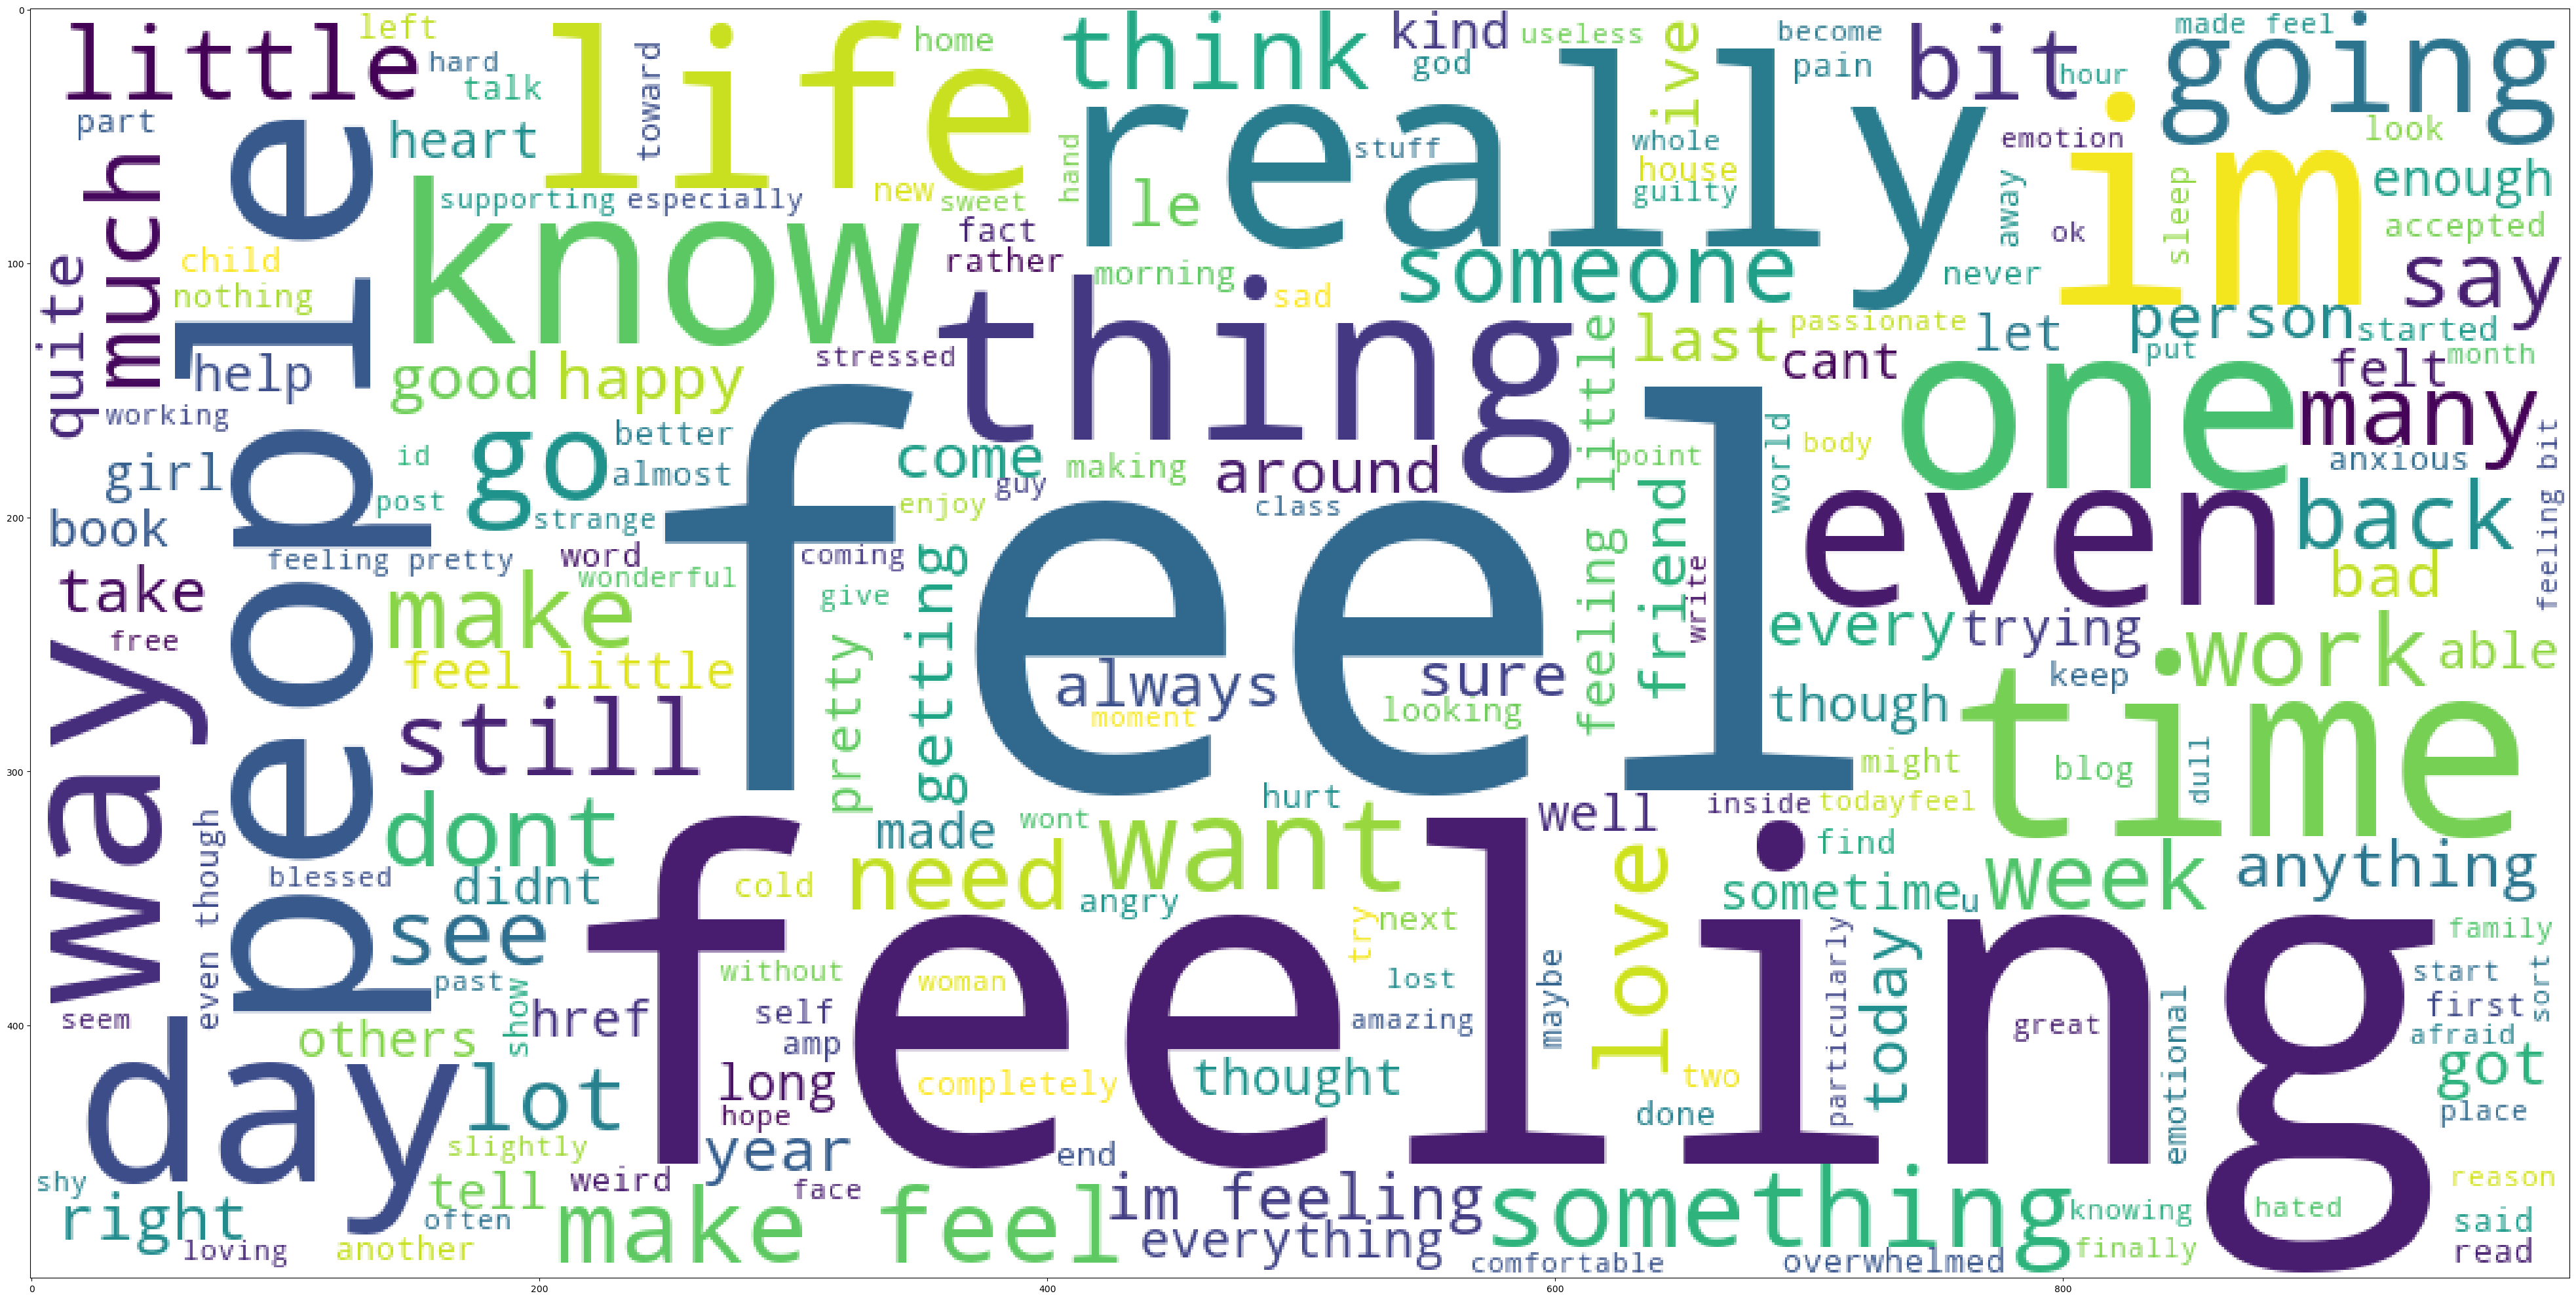

In [43]:
plt.figure(figsize=(50,28))
word_test=""
for i in var_test:
    for j in i:
        word_test +=" ".join(j)
wc_test=WordCloud(width=1000,height=500,background_color='white',min_font_size=10).generate(word_test)
plt.imshow(wc_test)

In [44]:
cv=CountVectorizer(ngram_range=(1,2))
testdata=cv.fit_transform(var_test)
x_test=testdata
y_test=df_test.label

Testing the model 

In [46]:
y_pred=rfc.predict(x_train)

#Model Evalution

In [48]:
accuracy_score(y_train,y_pred)

0.5552222222222222

In [60]:
import joblib

# Save after training
joblib.dump(cv, 'vectorizer.pkl')
joblib.dump(rfc, 'random_forest.pkl')


['random_forest.pkl']

In [61]:
import joblib

# Load pre-trained vectorizer and model
cv = joblib.load('vectorizer.pkl')
rfc = joblib.load('random_forest.pkl')


In [62]:
def sentimental_analysis(custom_input):
    # Apply text preprocessing (e.g., cleaning, tokenizing)
    new_input = transformation(custom_input)  # Ensure this returns a single string
    
    # Ensure the input is a single string for CountVectorizer
    if isinstance(new_input, list):
        new_input = " ".join(new_input)  # Convert list of tokens back to string
    
    # Transform input using the fitted vectorizer
    transformed_input = cv.transform([new_input])  # Use transform, not fit_transform
    
    # Predict sentiment using the trained model
    prediction = rfc.predict(transformed_input)  # Extract single prediction
    
    # Interpret the prediction
    if prediction == 0:
        print("Negative sentiment")
    elif prediction == 1:
        print("Positive sentiment")
    else:
        print("Invalid sentiment")


In [63]:
input='i was feeling a little vain when i did this one'
#if you want to take input from user
#inp=input("Enter your sentence")

In [64]:
sentimental_analysis(input)

ValueError: X has 18236 features, but RandomForestClassifier is expecting 117594 features as input.